## Regressão Logística

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Base de dados :

In [2]:
N = 100

D = 2

classes = 2

N_per_class = N // classes

eps = np.finfo(float).eps

In [3]:
X = np.random.randn(N,D)

X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

print(X[:10])

[[-1.85657822 -1.84007136]
 [-2.53752188 -1.89902334]
 [-3.02140523 -1.92533512]
 [-2.19629934 -2.54478582]
 [-2.65766976 -3.67730809]
 [-2.63326896 -3.12366339]
 [-2.57297834 -0.70310862]
 [-1.26242426 -1.79017576]
 [-3.27187967 -2.16322144]
 [-2.13575319 -1.94433137]]


## Preparação da base de dados para utilização no classificador :

## Features :

In [4]:
ones = np.ones((N, 1))

Xb = np.concatenate((ones, X), axis=1)

print(Xb[:10])

[[ 1.         -1.85657822 -1.84007136]
 [ 1.         -2.53752188 -1.89902334]
 [ 1.         -3.02140523 -1.92533512]
 [ 1.         -2.19629934 -2.54478582]
 [ 1.         -2.65766976 -3.67730809]
 [ 1.         -2.63326896 -3.12366339]
 [ 1.         -2.57297834 -0.70310862]
 [ 1.         -1.26242426 -1.79017576]
 [ 1.         -3.27187967 -2.16322144]
 [ 1.         -2.13575319 -1.94433137]]


In [5]:
Xb.shape

(100, 3)

## Classes :

In [6]:
T = np.array([0]*N_per_class + [1]*N_per_class)

print(T)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
T.shape

(100,)

## Visualização das classes :

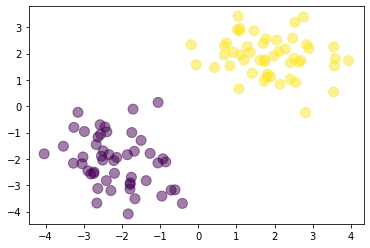

In [9]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

## Funções do classificador :

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i] + eps)
        else:
            E -= np.log(1 - Y[i] + eps)
    return E

## Inicialização e parâmetros do classificador :

In [12]:
num_iter = 250

learning_rate = 0.1

w = np.random.randn(D + 1)

print('Inicializacao dos coeficientes w do classificador =', w)

Inicializacao dos coeficientes w do classificador = [-1.27507303 -0.53206063  2.01299398]


## Algoritmo classificador :

In [13]:
Erro = []

Erro_ = []

for i in range(num_iter):
    
    Y = sigmoid(Xb.dot(w))
    
    w += learning_rate * Xb.T.dot(T - Y)
    
    Erro_ = Erro.append(cross_entropy(T, Y))

print("Coeficientes w do classificador:", w)

Coeficientes w do classificador: [-0.70109997  3.89893785  4.05808671]


## Visualização do erro :

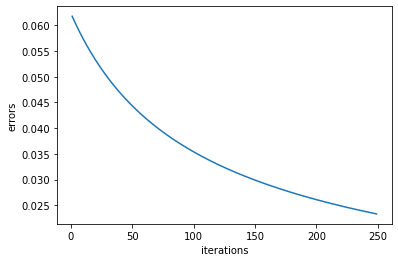

In [14]:
epochs = np.arange(1, num_iter)
plt.plot(epochs, np.array(Erro[1:]))
plt.xlabel('iterations')
plt.ylabel('errors')
plt.show()

## Visualização do classificador :

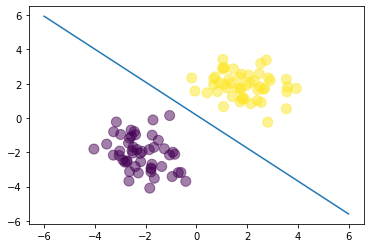

In [15]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

## Estimador da classe :

In [16]:
novaentrada = np.array([1 , 2 , -3])
classe = 'Amarela' if (sigmoid(novaentrada.dot(w)) > 0.5) else 'Roxa'
print('A nova entrada pertence a classe', classe)

A nova entrada pertence a classe Roxa
